In [1]:
import torchvision
torchvision.disable_beta_transforms_warning()
from torchvision.tv_tensors import BoundingBoxes, Mask
from torchvision.utils import draw_bounding_boxes, draw_segmentation_masks
import torchvision.transforms.v2  as transforms
from functools import partial
import numpy as np
import sys 
import os
sys.path.append("/home/tyfei/cyroem")
import utils
import pycocotools
import torch
import matplotlib.pyplot as plt
import pandas as pd
from transformers import DetrForObjectDetection, DetrImageProcessor, DetrForSegmentation

In [2]:

dataset = utils.CocoDetection("/data/tyfei/datasets/cyroem/test4/Mean10", 
                        "/data/tyfei/datasets/cyroem/test4/npy_annotations.pkl",
                        is_npy=True, transform=utils.getDefaultTransform(), require_mask=True, add_classname=True)
train_set, val_set = torch.utils.data.random_split(dataset, [0.8, 0.2])

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


/home/tyfei/.local/lib/python3.12/site-packages/torchvision/utils.py:224: UserWarning: Argument 'font_size' will be ignored since 'font' is not set.
  warnings.warn("Argument 'font_size' will be ignored since 'font' is not set.")


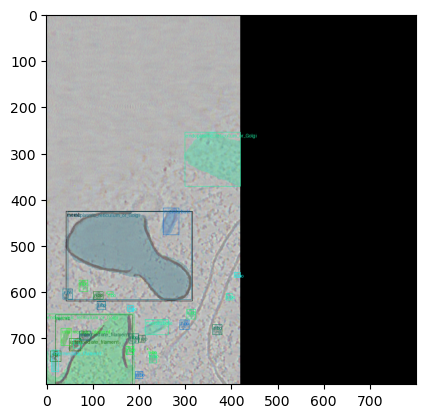

In [3]:
data = dataset[20]
utils.drawannotation(data["pixel_values"], data["labels"])
# print(image)
# cimage, target = allt(torch.tensor(image), target)

In [5]:
data["labels"]["boxes"]

BoundingBoxes([[ 43, 426, 316, 620],
               [ 20, 650, 187, 800],
               [173, 718, 189, 736],
               [179, 691, 200, 711],
               [223, 732, 239, 754],
               [110, 621, 128, 639],
               [389, 604, 402, 618],
               [193, 772, 209, 788],
               [176, 630, 189, 643],
               [102, 600, 123, 616],
               [ 71, 575,  90, 599],
               [360, 671, 380, 693],
               [304, 638, 323, 659],
               [ 36, 594,  57, 616],
               [ 59, 703,  76, 722],
               [289, 661, 309, 682],
               [407, 558, 420, 569],
               [  9, 728,  32, 751],
               [219, 723, 220, 725],
               [199, 694, 214, 709],
               [131, 600, 145, 605],
               [ 73, 685,  97, 705],
               [214, 660, 264, 693],
               [253, 419, 287, 477],
               [ 12, 726,  27, 773],
               [ 50, 701,  75, 728],
               [ 32, 679,  54, 716],
 

In [11]:
mask

tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])

In [292]:
image.shape

torch.Size([3, 359, 430])

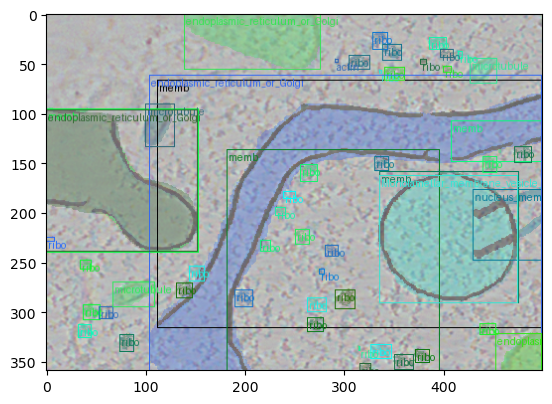

In [295]:
newrr = transforms.Resize((359, 500))
image, target = newrr(image, target)
drawannotation(image, target)

/home/tyfei/.local/lib/python3.12/site-packages/torchvision/utils.py:224: UserWarning: Argument 'font_size' will be ignored since 'font' is not set.
  warnings.warn("Argument 'font_size' will be ignored since 'font' is not set.")


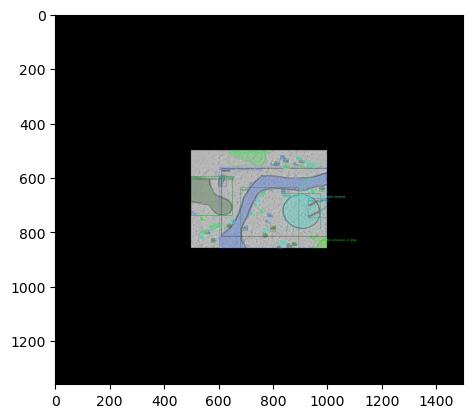

In [296]:
newrr = transforms.Pad((500, 500))
newimage, newtarget = newrr(image, target)
drawannotation(newimage, newtarget)

In [192]:
cococdataset[20][1]["labels"]

tensor([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,
         4,  4,  4,  7,  5, 11, 11,  9,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
         6,  6, 12, 12, 12, 12, 12, 12, 12])

/tmp/ipykernel_1204575/930626644.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  image = torch.tensor(image*255).type(torch.uint8)


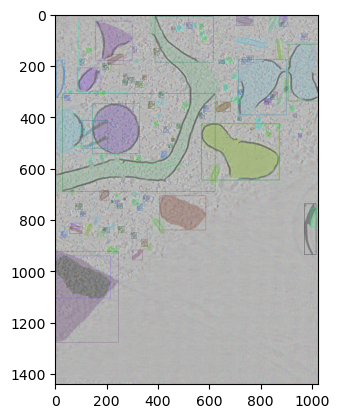

In [155]:
image, target = cococdataset[20]
drawannotation(image, target)


In [217]:
allt = transforms.Compose([
    transforms.ToImage(),
    transforms.ToDtype(torch.float32, scale=True), 
    transforms.Normalize(mean=[0, 0, 0], std=[1, 1, 1]),
    # transforms.Lambda(lambda x:torch.clamp(x, min=-4.0, max=4.0)), 
    transforms.RandomIoUCrop(), 
    transforms.RandomHorizontalFlip(p=0.5), 
    transforms.RandomVerticalFlip(p=0.5), 
    transforms.SanitizeBoundingBoxes(),
])

In [227]:
# allt = transforms.RandomIoUCrop()
# iou_crop = transforms.RandomCrop((600, 600))
# print(image.shape)
image, target = cococdataset[20]
# print(image)
cimage, target = allt(torch.tensor(image), target)
# print(cimage.shape)
# drawannotation(image.numpy(), target)

In [134]:
target["masks"].shape 
target["boxes"].shape

torch.Size([135, 4])

In [135]:
target["labels"]

tensor([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,
         4,  4,  4,  7,  5, 11, 11,  9,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
         6,  6, 12, 12, 12, 12, 12, 12, 12])

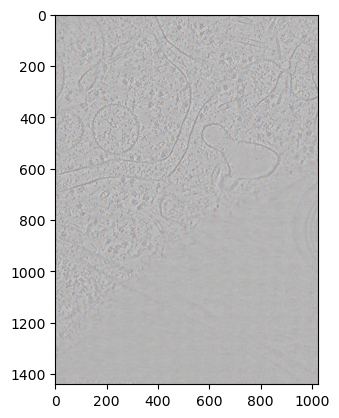

In [92]:
plt.imshow(np.moveaxis(image, 0, -1))